In [1]:
import pandas as pd
import numpy as np
import re
import math
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import datetime
import openpyxl 
import os
import re
import seaborn as sns

C:\Users\maxym\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [3]:
plik = 'dane_final.xlsx'

In [4]:
columns = ['id','cena','cale','piksele','wyswietlacz_typ','czestotliwosc_odswiezania_ekranu','aparat','system'
           ,'ram','pamiec','czytnik_kart','menu_pl','wi-fi','rozdzielczosc_wideo','gwarancja','waga','bluetooth',
           '5g','bateria','cena']

In [5]:
dane = pd.read_excel(plik, usecols=columns)

In [6]:
dane["cale"] = dane["cale"].str.replace(',', '.') 
dane['cale'] = dane['cale'].astype('float')

In [7]:
dane["ram"] = dane["ram"].str.replace('<0,5', '0.2') 
dane["ram"] = dane["ram"].str.replace(',', '.') 
dane['ram'] = dane['ram'].astype('float')

In [8]:
dane['rozdzielczosc_wideo'] = dane['rozdzielczosc_wideo'].str.strip()

piksele rozbicie na 2 kolumny

In [9]:
dane[['px1', 'px2']] = dane['piksele'].str.split(' x ', expand=True)
dane = dane.drop('piksele', axis=1)

In [10]:
dane['px1'] = dane['px1'].str.strip()
dane['px1'] = dane['px1'].astype('int')
dane['px2'] = dane['px2'].str.strip()
dane['px2'] = dane['px2'].astype('int')

wyswietlacz_typ, system, rozdzielczosc_wideo rozbicie na kolumny

In [11]:
dummy_vars = pd.get_dummies(dane['wyswietlacz_typ'])
dummy_vars1 = pd.get_dummies(dane['system'])
dummy_vars2 = pd.get_dummies(dane['rozdzielczosc_wideo'])
dane[dummy_vars.columns] = dummy_vars
dane[dummy_vars1.columns] = dummy_vars1
dane[dummy_vars2.columns] = dummy_vars2

In [12]:
dane = dane.drop('wyswietlacz_typ', axis=1)
dane = dane.drop('system', axis=1)
dane = dane.drop('rozdzielczosc_wideo', axis=1)

In [17]:
dane.head()

,cale,czestotliwosc_odswiezania_ekranu,aparat,ram,pamiec,czytnik_kart,menu_pl,wi-fi,gwarancja,waga,bluetooth,5g,bateria,cena,id,px1,px2,AMOLED,INNY,IPS,OLED,POLED,ANDROID,IOS,2K,4K,6K,8K,FullHD,HD
0,6.50,60,63.0,4.0,64.0,1,1,1,24,205.0,1,1,5000,999.0,1,1600,720,0,0,0,0,0,1,0,0,1,0,0,0,0
1,6.60,60,8.0,2.0,32.0,1,1,1,24,198.0,1,0,5000,349.0,2,1600,720,0,0,1,0,0,1,0,1,0,0,0,0,0
2,6.43,90,60.0,8.0,128.0,0,1,1,24,190.0,1,1,4500,1899.0,3,2408,1080,1,0,0,0,0,1,0,0,1,0,0,0,0
3,6.67,120,58.0,8.0,256.0,1,1,1,24,189.0,1,1,5000,1599.0,4,2400,1080,1,0,0,0,0,1,0,0,0,0,0,1,0
4,6.67,120,58.0,8.0,256.0,1,1,1,24,189.0,1,1,5000,1599.0,5,2400,1080,1,0,0,0,0,1,0,0,0,0,0,1,0


In [18]:
dane.isnull().sum().sort_values()

cale                                0
8K                                  0
6K                                  0
4K                                  0
2K                                  0
IOS                                 0
ANDROID                             0
POLED                               0
OLED                                0
IPS                                 0
INNY                                0
AMOLED                              0
px2                                 0
px1                                 0
id                                  0
cena                                0
bateria                             0
5g                                  0
bluetooth                           0
waga                                0
gwarancja                           0
wi-fi                               0
menu_pl                             0
czytnik_kart                        0
pamiec                              0
ram                                 0
aparat      

In [19]:
dane.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1294 entries, 0 to 1293
Data columns (total 30 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   cale                              1294 non-null   float64
 1   czestotliwosc_odswiezania_ekranu  1294 non-null   int64  
 2   aparat                            1294 non-null   float64
 3   ram                               1294 non-null   float64
 4   pamiec                            1294 non-null   float64
 5   czytnik_kart                      1294 non-null   int64  
 6   menu_pl                           1294 non-null   int64  
 7   wi-fi                             1294 non-null   int64  
 8   gwarancja                         1294 non-null   int64  
 9   waga                              1294 non-null   float64
 10  bluetooth                         1294 non-null   int64  
 11  5g                                1294 non-null   int64  
 12  bateri

In [20]:
dane.describe()

,cale,czestotliwosc_odswiezania_ekranu,aparat,ram,pamiec,czytnik_kart,menu_pl,wi-fi,gwarancja,waga,bluetooth,5g,bateria,cena,id,px1,px2,AMOLED,INNY,IPS,OLED,POLED,ANDROID,IOS,2K,4K,6K,8K,FullHD,HD
count,1294.000000,1294.000000,1294.000000,1294.000000,1294.000000,1294.000000,1294.000000,1294.000000,1294.00000,1294.000000,1294.0,1294.00000,1294.000000,1294.000000,1294.000000,1294.000000,1294.000000,1294.000000,1294.000000,1294.000000,1294.000000,1294.000000,1294.000000,1294.000000,1294.000000,1294.000000,1294.000000,1294.000000,1294.000000,1294.000000
mean,6.279853,85.952087,56.811113,5.995363,162.795751,0.501546,0.991499,0.984544,22.18238,193.769320,1.0,0.51391,4464.036321,2482.877852,647.500000,2188.327666,1010.513138,0.370170,0.031685,0.263524,0.192427,0.015456,0.809892,0.158423,0.009274,0.410355,0.000773,0.078053,0.493818,0.007728
std,0.714817,28.869188,40.753308,2.796981,152.209724,0.500191,0.091842,0.123405,4.55515,37.799596,0.0,0.50000,1148.244801,2191.843280,373.689934,545.116312,242.870198,0.483037,0.175227,0.440714,0.394359,0.123405,0.392538,0.365279,0.095889,0.492088,0.027799,0.268358,0.500155,0.087602
min,2.000000,60.000000,0.300000,0.200000,0.004000,0.000000,0.000000,0.000000,12.00000,80.000000,1.0,0.00000,800.000000,99.000000,1.000000,176.000000,144.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,6.100000,60.000000,24.000000,4.000000,64.000000,0.000000,1.000000,1.000000,24.00000,175.000000,1.0,0.00000,4000.000000,899.000000,324.250000,1612.000000,750.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,6.500000,60.000000,57.000000,6.000000,128.000000,1.000000,1.000000,1.000000,24.00000,193.000000,1.0,1.00000,4520.000000,1599.000000,647.500000,2400.000000,1080.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,6.670000,120.000000,74.000000,8.000000,256.000000,1.000000,1.000000,1.000000,24.00000,203.000000,1.0,1.00000,5000.000000,3499.000000,970.750000,2408.000000,1080.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000
max,7.600000,165.000000,262.000000,16.000000,1000.000000,1.000000,1.000000,1.000000,36.00000,492.000000,1.0,1.00000,13200.000000,10999.000000,1294.000000,3840.000000,1812.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [21]:
columns_desc = ['cale', 'czestotliwosc_odswiezania_ekranu', 'aparat','ram','waga','bateria','cena','px1','px2']
dane_ = dane[columns_desc]
dane_.describe().round(2)

,cale,czestotliwosc_odswiezania_ekranu,aparat,ram,waga,bateria,cena,px1,px2
count,1294.00,1294.00,1294.00,1294.0,1294.00,1294.00,1294.00,1294.00,1294.00
mean,6.28,85.95,56.81,6.0,193.77,4464.04,2482.88,2188.33,1010.51
std,0.71,28.87,40.75,2.8,37.80,1148.24,2191.84,545.12,242.87
min,2.00,60.00,0.30,0.2,80.00,800.00,99.00,176.00,144.00
25%,6.10,60.00,24.00,4.0,175.00,4000.00,899.00,1612.00,750.00
50%,6.50,60.00,57.00,6.0,193.00,4520.00,1599.00,2400.00,1080.00
75%,6.67,120.00,74.00,8.0,203.00,5000.00,3499.00,2408.00,1080.00
max,7.60,165.00,262.00,16.0,492.00,13200.00,10999.00,3840.00,1812.00


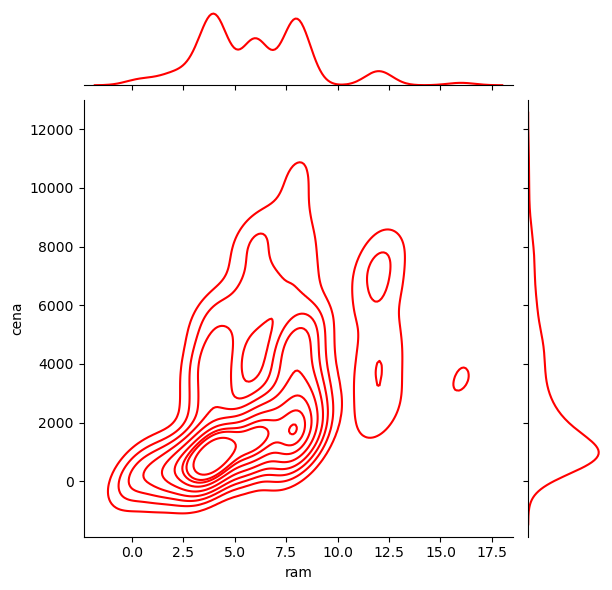

In [22]:
sns.jointplot(x='ram',y='cena',data=dane,color='red',kind='kde');

<AxesSubplot:xlabel='cena', ylabel='pamiec'>

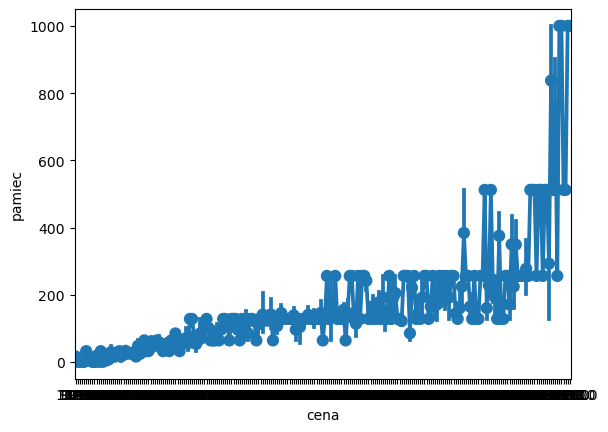

In [23]:
sns.pointplot(y="pamiec", x="cena", data=dane)

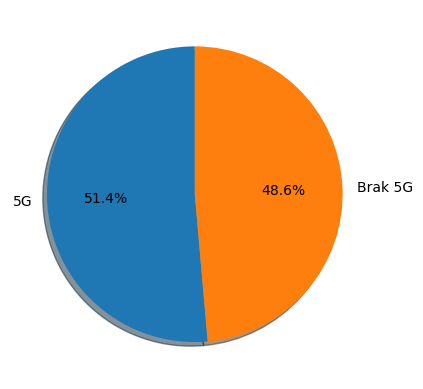

In [24]:
labels5g = ["5G",'Brak 5G']
values5g = dane['5g'].value_counts().values
fig1, ax1 = plt.subplots()
ax1.pie(values5g, labels=labels5g, autopct='%1.1f%%',shadow=True,startangle=90)
plt.show()

<AxesSubplot:xlabel='cena', ylabel='bateria'>

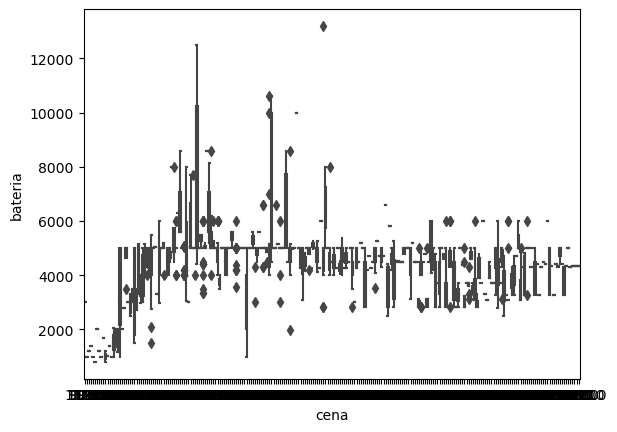

In [25]:
sns.boxplot(x="cena", y="bateria", data=dane)

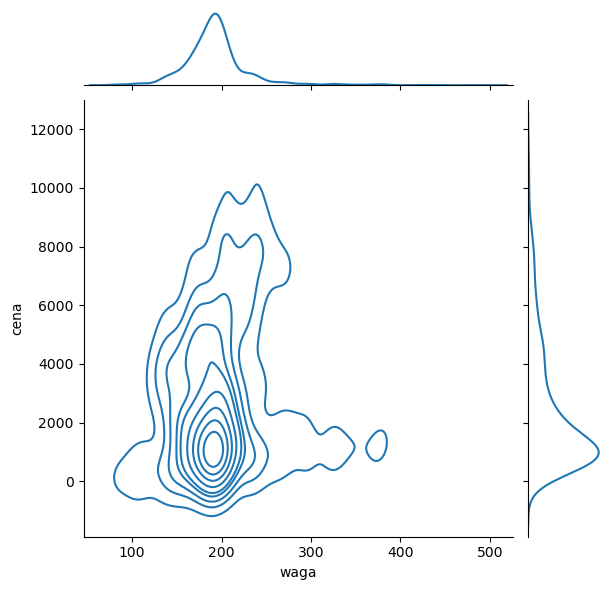

In [26]:
sns.jointplot(x='waga',y='cena',data=dane,kind='kde');

In [ ]:
X = dane.drop('cena',axis=1)
y = dane['cena']

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=101)

In [ ]:
from sklearn.preprocessing import MinMaxScaler

In [ ]:
scaler = MinMaxScaler()

In [ ]:
X_train= scaler.fit_transform(X_train)

In [ ]:
X_test = scaler.transform(X_test)

In [ ]:
X_train.shape

In [ ]:
X_test.shape

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Dropout
from tensorflow.keras.optimizers import Adam

In [ ]:
model = Sequential()

model.add(Dense(70,activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(140,activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(140,activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(140,activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(units=1))

model.compile(optimizer='adam',loss='mse')

In [ ]:
model.fit(x=X_train,y=y_train.values,
          validation_data=(X_test,y_test.values),
          batch_size=64,epochs=400)

In [ ]:
losses = pd.DataFrame(model.history.history)

In [ ]:
losses.plot()

In [ ]:
from sklearn.metrics import mean_squared_error,mean_absolute_error,explained_variance_score

In [ ]:
X_test

In [ ]:
predictions = model.predict(X_test)

In [ ]:
predictions

In [ ]:
X_test

In [ ]:
mean_absolute_error(y_test,predictions)

In [ ]:
np.sqrt(mean_squared_error(y_test,predictions))

In [ ]:
explained_variance_score(y_test,predictions)

In [ ]:
dane['cena'].mean()

In [ ]:
dane['cena'].median()

In [ ]:
import matplotlib.pyplot as plt
# Our predictions
plt.scatter(y_test,predictions)

# Perfect predictions
plt.plot(y_test,y_test,'r')